### Loading


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive to access the dataset (if necessary)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
# Replace the file path with the correct location of your dataset in Google Drive
file_path = '/content/drive/MyDrive/Andys_Group/Original dataset/CLEAN- PCOS SURVEY SPREADSHEET.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

First few rows of the dataset:
   Age (in Years)  Weight (in Kg)  Height (in Cm / Feet)  \
0              21            47.0                  168.0   
1              21            45.0                  156.0   
2              17            37.0                  162.0   
3              28            54.0                  160.0   
4              45            40.0                  150.0   

   Can you tell us your blood group ?  \
0                                  13   
1                                  11   
2                                  15   
3                                  15   
4                                  13   

   After how many months do you get your periods?\n(select 1- if every month/regular)  \
0                                                  1                                    
1                                                  1                                    
2                                                  1                                    
3    

## data cleaning

In [ ]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check column names
print("Columns in the dataset:", df.columns)

# Check data types and null values
print("Dataset Info:")
print(df.info())

Shape of the dataset: (465, 16)
Columns in the dataset: Index(['Age (in Years)', 'Weight (in Kg)', 'Height (in Cm / Feet)',
       'Can you tell us your blood group ?',
       'After how many months do you get your periods?\n(select 1- if every month/regular)',
       'Have you gained weight recently?',
       'Do you have excessive body/facial hair growth ?',
       'Are you noticing skin darkening recently?',
       'Do have hair loss/hair thinning/baldness ?',
       'Do you have pimples/acne on your face/jawline ?',
       'Do you eat fast food regularly ?',
       'Do you exercise on a regular basis ?',
       'Have you been diagnosed with PCOS/PCOD?',
       'Do you experience mood swings ?', 'Are your periods regular ?',
       'How long does your period last ? (in Days)\nexample- 1,2,3,4.....'],
      dtype='object')
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column                                 

In [ ]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Age (in Years)                                                                        0
Weight (in Kg)                                                                        0
Height (in Cm / Feet)                                                                 0
Can you tell us your blood group ?                                                    0
After how many months do you get your periods?\n(select 1- if every month/regular)    0
Have you gained weight recently?                                                      0
Do you have excessive body/facial hair growth ?                                       0
Are you noticing skin darkening recently?                                             0
Do have hair loss/hair thinning/baldness ?                                            0
Do you have pimples/acne on your face/jawline ?                                       0
Do you eat fast food regularly ?                                                      0
Do y

In [ ]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))

# Display the duplicate rows
print(duplicates)

Number of duplicate rows: 1
     Age (in Years)  Weight (in Kg)  Height (in Cm / Feet)  \
219              21            58.0                  155.0   

     Can you tell us your blood group ?  \
219                                  13   

     After how many months do you get your periods?\n(select 1- if every month/regular)  \
219                                                  1                                    

     Have you gained weight recently?  \
219                                 1   

     Do you have excessive body/facial hair growth ?  \
219                                                0   

     Are you noticing skin darkening recently?  \
219                                          1   

     Do have hair loss/hair thinning/baldness ?  \
219                                           1   

     Do you have pimples/acne on your face/jawline ?  \
219                                                1   

     Do you eat fast food regularly ?  Do you exercise on a regu

In [ ]:
# Drop duplicate rows and keep the first occurrence by default
df = df.drop_duplicates()

Rename dataset for simplicity

In [ ]:
# Rename columns for simplicity (if not already done)
col = {
  "Have you been diagnosed with PCOS/PCOD?": "PCOS (Y/N)",
  "Age (in Years)": "Age",
  "Weight (in Kg)": "Weight",
  "Height (in Cm / Feet)": "Height",
  "Can you tell us your blood group ?": "Blood Group",
  "After how many months do you get your periods?\n(select 1- if every month/regular)": "Period Frequency (months)",
  "Have you gained weight recently?": "Weight Gain (Y/N)",
  "Do you have excessive body/facial hair growth ?": "Body Hair Growth (Y/N)",
  "Are you noticing skin darkening recently?": "Skin Darkening (Y/N)",
  "Do have hair loss/hair thinning/baldness ?": "Hair Loss (Y/N)",
  "Do you have pimples/acne on your face/jawline ?": "Acne (Y/N)",
  "Do you eat fast food regularly ?": "Fast Food (Y/N)",
  "Do you exercise on a regular basis ?": "Exercise (Y/N)",
  "Do you experience mood swings ?": "Mood Swings (Y/N)",
  "Are your periods regular ?": "Regular Periods (Y/N)",
  "How long does your period last ? (in Days)\nexample- 1,2,3,4.....": "Period Duration (Days)",
}

df.rename(
    columns=col,
    inplace=True,
)

# Display the first few rows
print(df.head())

   Age  Weight  Height  Blood Group  Period Frequency (months)  \
0   21    47.0   168.0           13                          1   
1   21    45.0   156.0           11                          1   
2   17    37.0   162.0           15                          1   
3   28    54.0   160.0           15                          1   
4   45    40.0   150.0           13                          2   

   Weight Gain (Y/N)  Body Hair Growth (Y/N)  Skin Darkening (Y/N)  \
0                  0                       0                     0   
1                  0                       0                     1   
2                  0                       0                     0   
3                  0                       0                     0   
4                  0                       0                     0   

   Hair Loss (Y/N)  Acne (Y/N)  Fast Food (Y/N)  Exercise (Y/N)  PCOS (Y/N)  \
0                0           0                0               0           0   
1                1      

<ipython-input-8-0fa12fa94f07>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(


# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## General Dataset Overview

### Univariate Analysis (age)

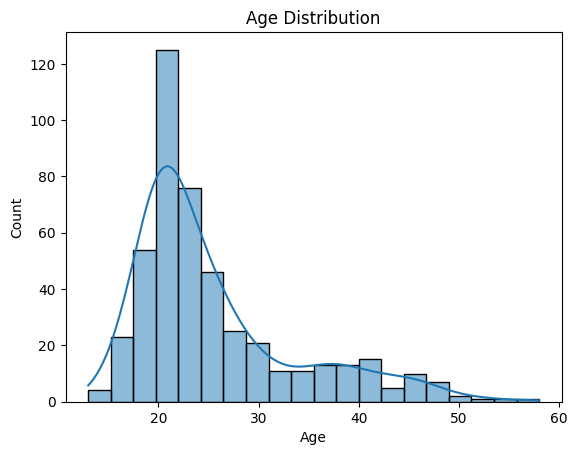

In [ ]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

### Distributions of PCOS diagnosis

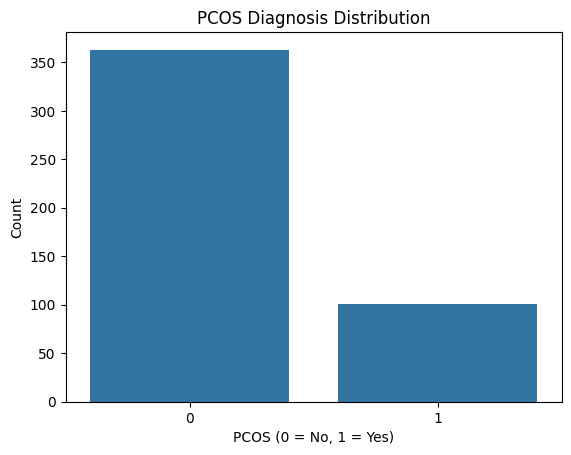

Percentage Distribution of PCOS Diagnosis:
PCOS (Y/N)
0    78.232759
1    21.767241
Name: proportion, dtype: float64


In [ ]:
# Countplot for PCOS diagnosis
sns.countplot(x="PCOS (Y/N)", data=df)
plt.title("PCOS Diagnosis Distribution")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Percentage distribution
pcos_percentage = df["PCOS (Y/N)"].value_counts(normalize=True) * 100
print("Percentage Distribution of PCOS Diagnosis:")
print(pcos_percentage)

### Boxpot for numeric features

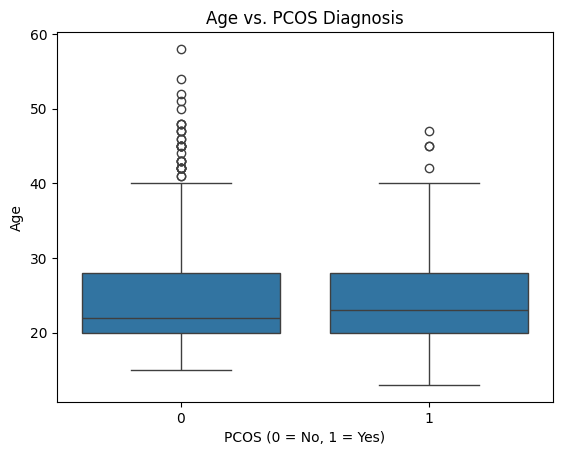

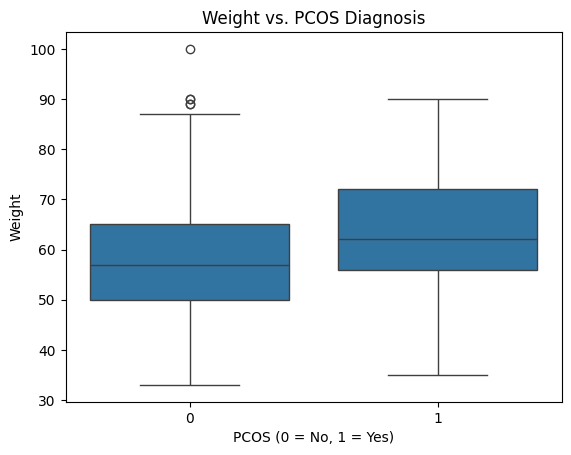

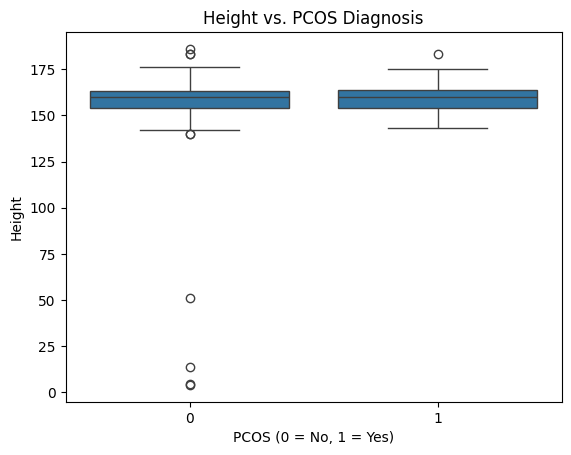

In [ ]:
# Boxplot for numeric features
numeric_features = ["Age", "Weight", "Height"]

for feature in numeric_features:
    sns.boxplot(x="PCOS (Y/N)", y=feature, data=df)
    plt.title(f"{feature} vs. PCOS Diagnosis")
    plt.xlabel("PCOS (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()

## PCOS VS Binary features
    "Gained Weight",
    "Body Hair Growth",
    "Skin Darkening",
    "Hair Loss",
    "Acne",
    "Fast Food",
    "Exercise",
    "Mood Swings",
    "Regular Periods"

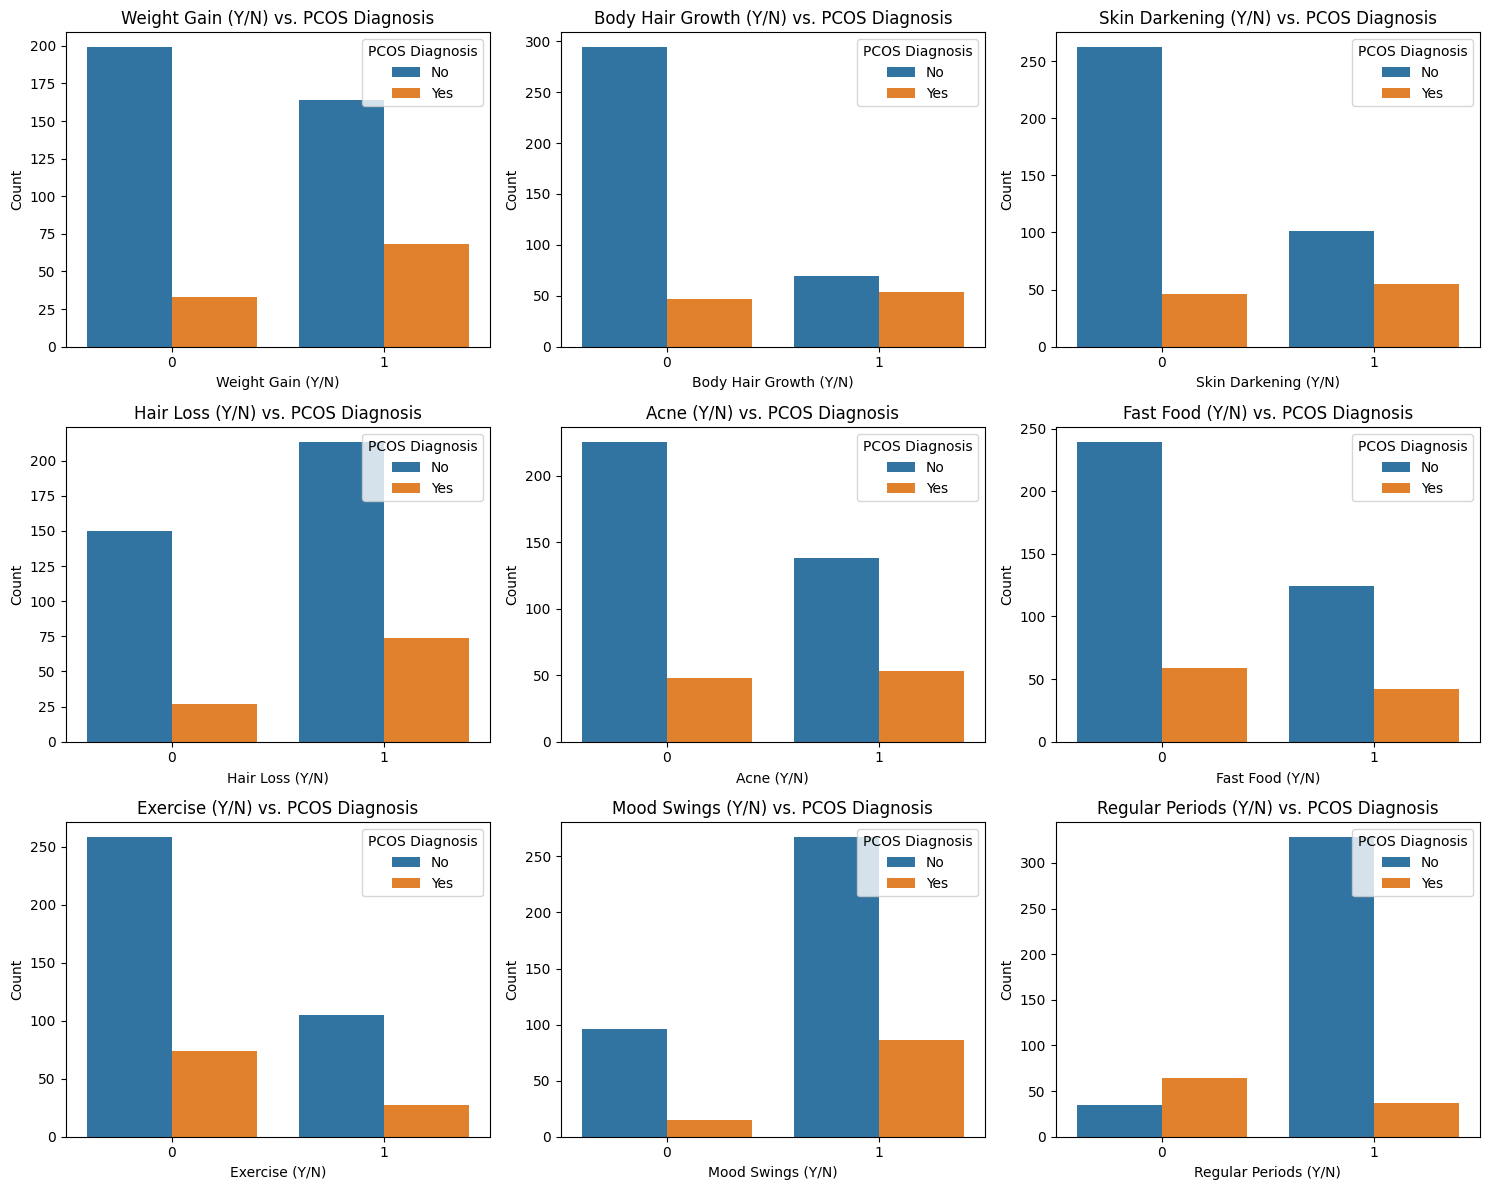

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of binary features
binary_features = [
    "Weight Gain (Y/N)",
    "Body Hair Growth (Y/N)",
    "Skin Darkening (Y/N)",
    "Hair Loss (Y/N)",
    "Acne (Y/N)",
    "Fast Food (Y/N)",
    "Exercise (Y/N)",
    "Mood Swings (Y/N)",
    "Regular Periods (Y/N)",
]

# Create subplots: Adjust the number of rows and columns based on the number of features
rows = 3  # Number of rows
cols = 3  # Number of columns
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))  # Adjust figsize for spacing
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through features and plot
for i, feature in enumerate(binary_features):
    sns.countplot(x=feature, hue="PCOS (Y/N)", data=df, ax=axes[i])
    axes[i].set_title(f"{feature} vs. PCOS Diagnosis")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="PCOS Diagnosis", loc="upper right", labels=["No", "Yes"])

# Remove empty subplots (if any)
for i in range(len(binary_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a single image
plt.savefig("binary_features_vs_pcos.png")

# Show the figure
plt.show()

### Normalize counts to percentages for each categorical column

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Add binary columns (e.g., 0/1 responses) to the list of categorical columns
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns.extend(binary_columns)

# Remove duplicate column names
categorical_columns = list(set(categorical_columns))
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Weight Gain (Y/N)', 'Skin Darkening (Y/N)', 'Regular Periods (Y/N)', 'Fast Food (Y/N)', 'Exercise (Y/N)', 'Hair Loss (Y/N)', 'Body Hair Growth (Y/N)', 'PCOS (Y/N)', 'Acne (Y/N)', 'Mood Swings (Y/N)']


Percentage distribution for Weight Gain (Y/N):
Weight Gain (Y/N)
0    50.0
1    50.0
Name: proportion, dtype: float64

Percentage distribution for Skin Darkening (Y/N):
Skin Darkening (Y/N)
0    66.37931
1    33.62069
Name: proportion, dtype: float64

Percentage distribution for Regular Periods (Y/N):
Regular Periods (Y/N)
1    78.663793
0    21.336207
Name: proportion, dtype: float64

Percentage distribution for Fast Food (Y/N):
Fast Food (Y/N)
0    64.224138
1    35.775862
Name: proportion, dtype: float64

Percentage distribution for Exercise (Y/N):
Exercise (Y/N)
0    71.551724
1    28.448276
Name: proportion, dtype: float64

Percentage distribution for Hair Loss (Y/N):
Hair Loss (Y/N)
1    61.853448
0    38.146552
Name: proportion, dtype: float64

Percentage distribution for Body Hair Growth (Y/N):
Body Hair Growth (Y/N)
0    73.491379
1    26.508621
Name: proportion, dtype: float64

Percentage distribution for PCOS (Y/N):
PCOS (Y/N)
0    78.232759
1    21.767241
Name: proportion, 

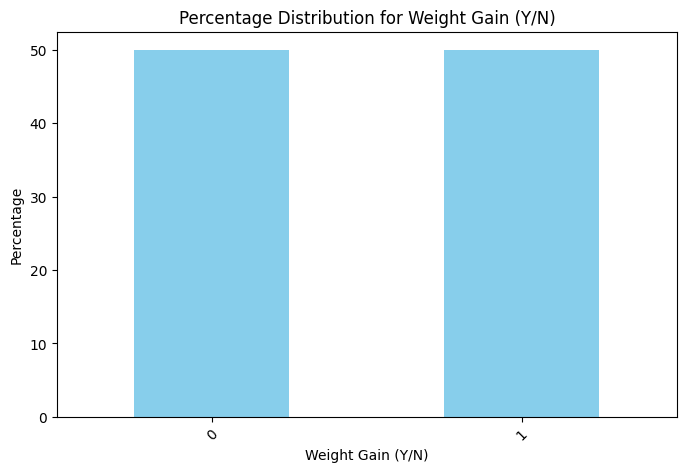

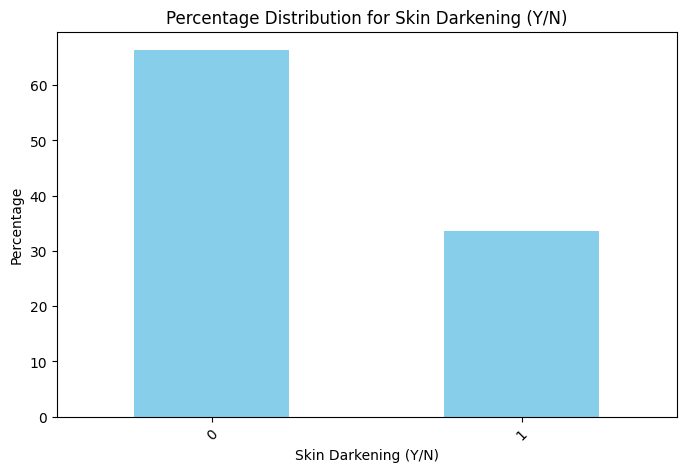

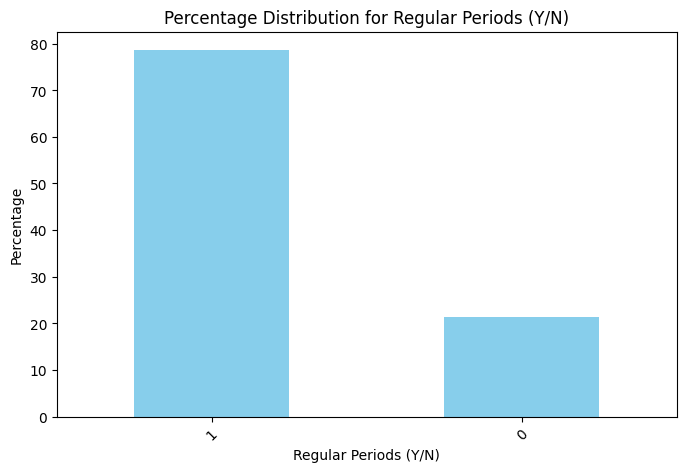

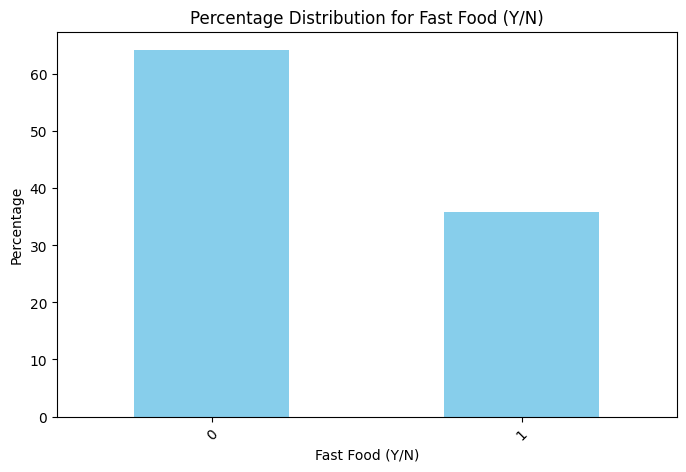

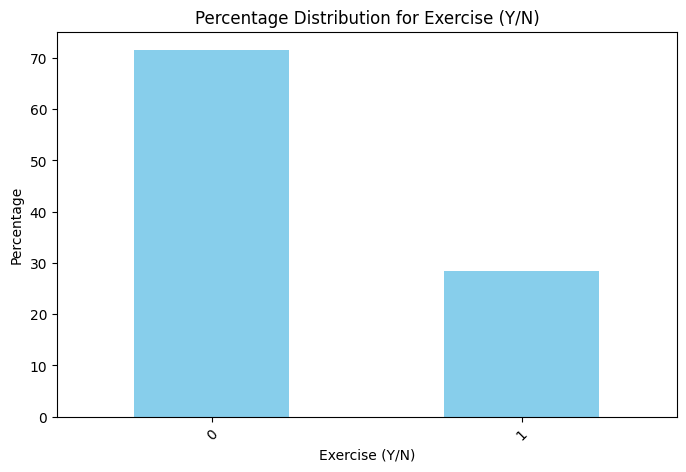

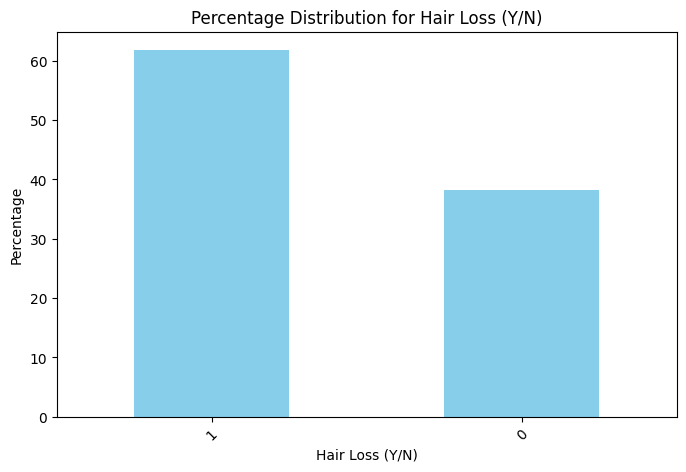

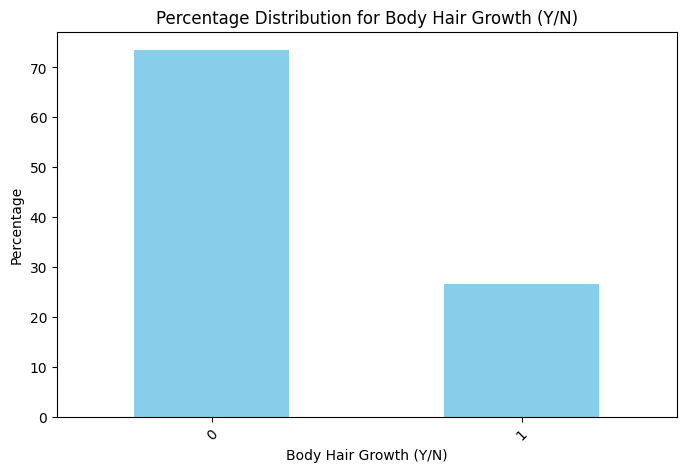

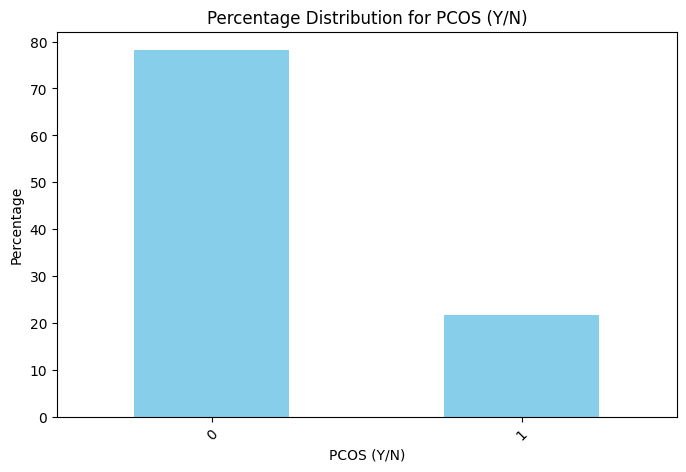

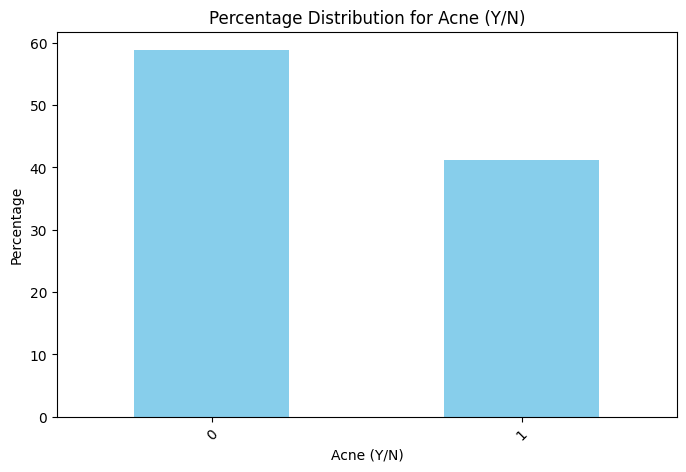

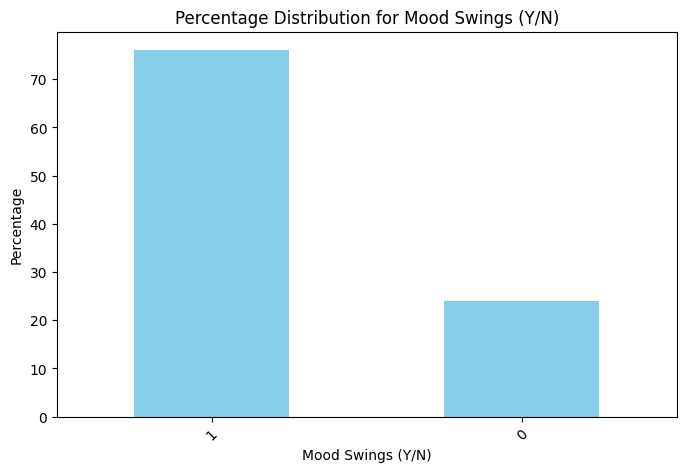

In [ ]:
# Normalize counts to percentages for each categorical column
normalized_percentages = {}

for col in categorical_columns:
    normalized_percentages[col] = (
        df[col].value_counts(normalize=True) * 100
    )  # Calculate percentages
    print(f"Percentage distribution for {col}:\n{normalized_percentages[col]}\n")

# Plot normalized percentages for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    normalized_percentages[col].plot(kind='bar', color='skyblue')
    plt.title(f"Percentage Distribution for {col}")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

### Normalizing Percentages by PCOS Status

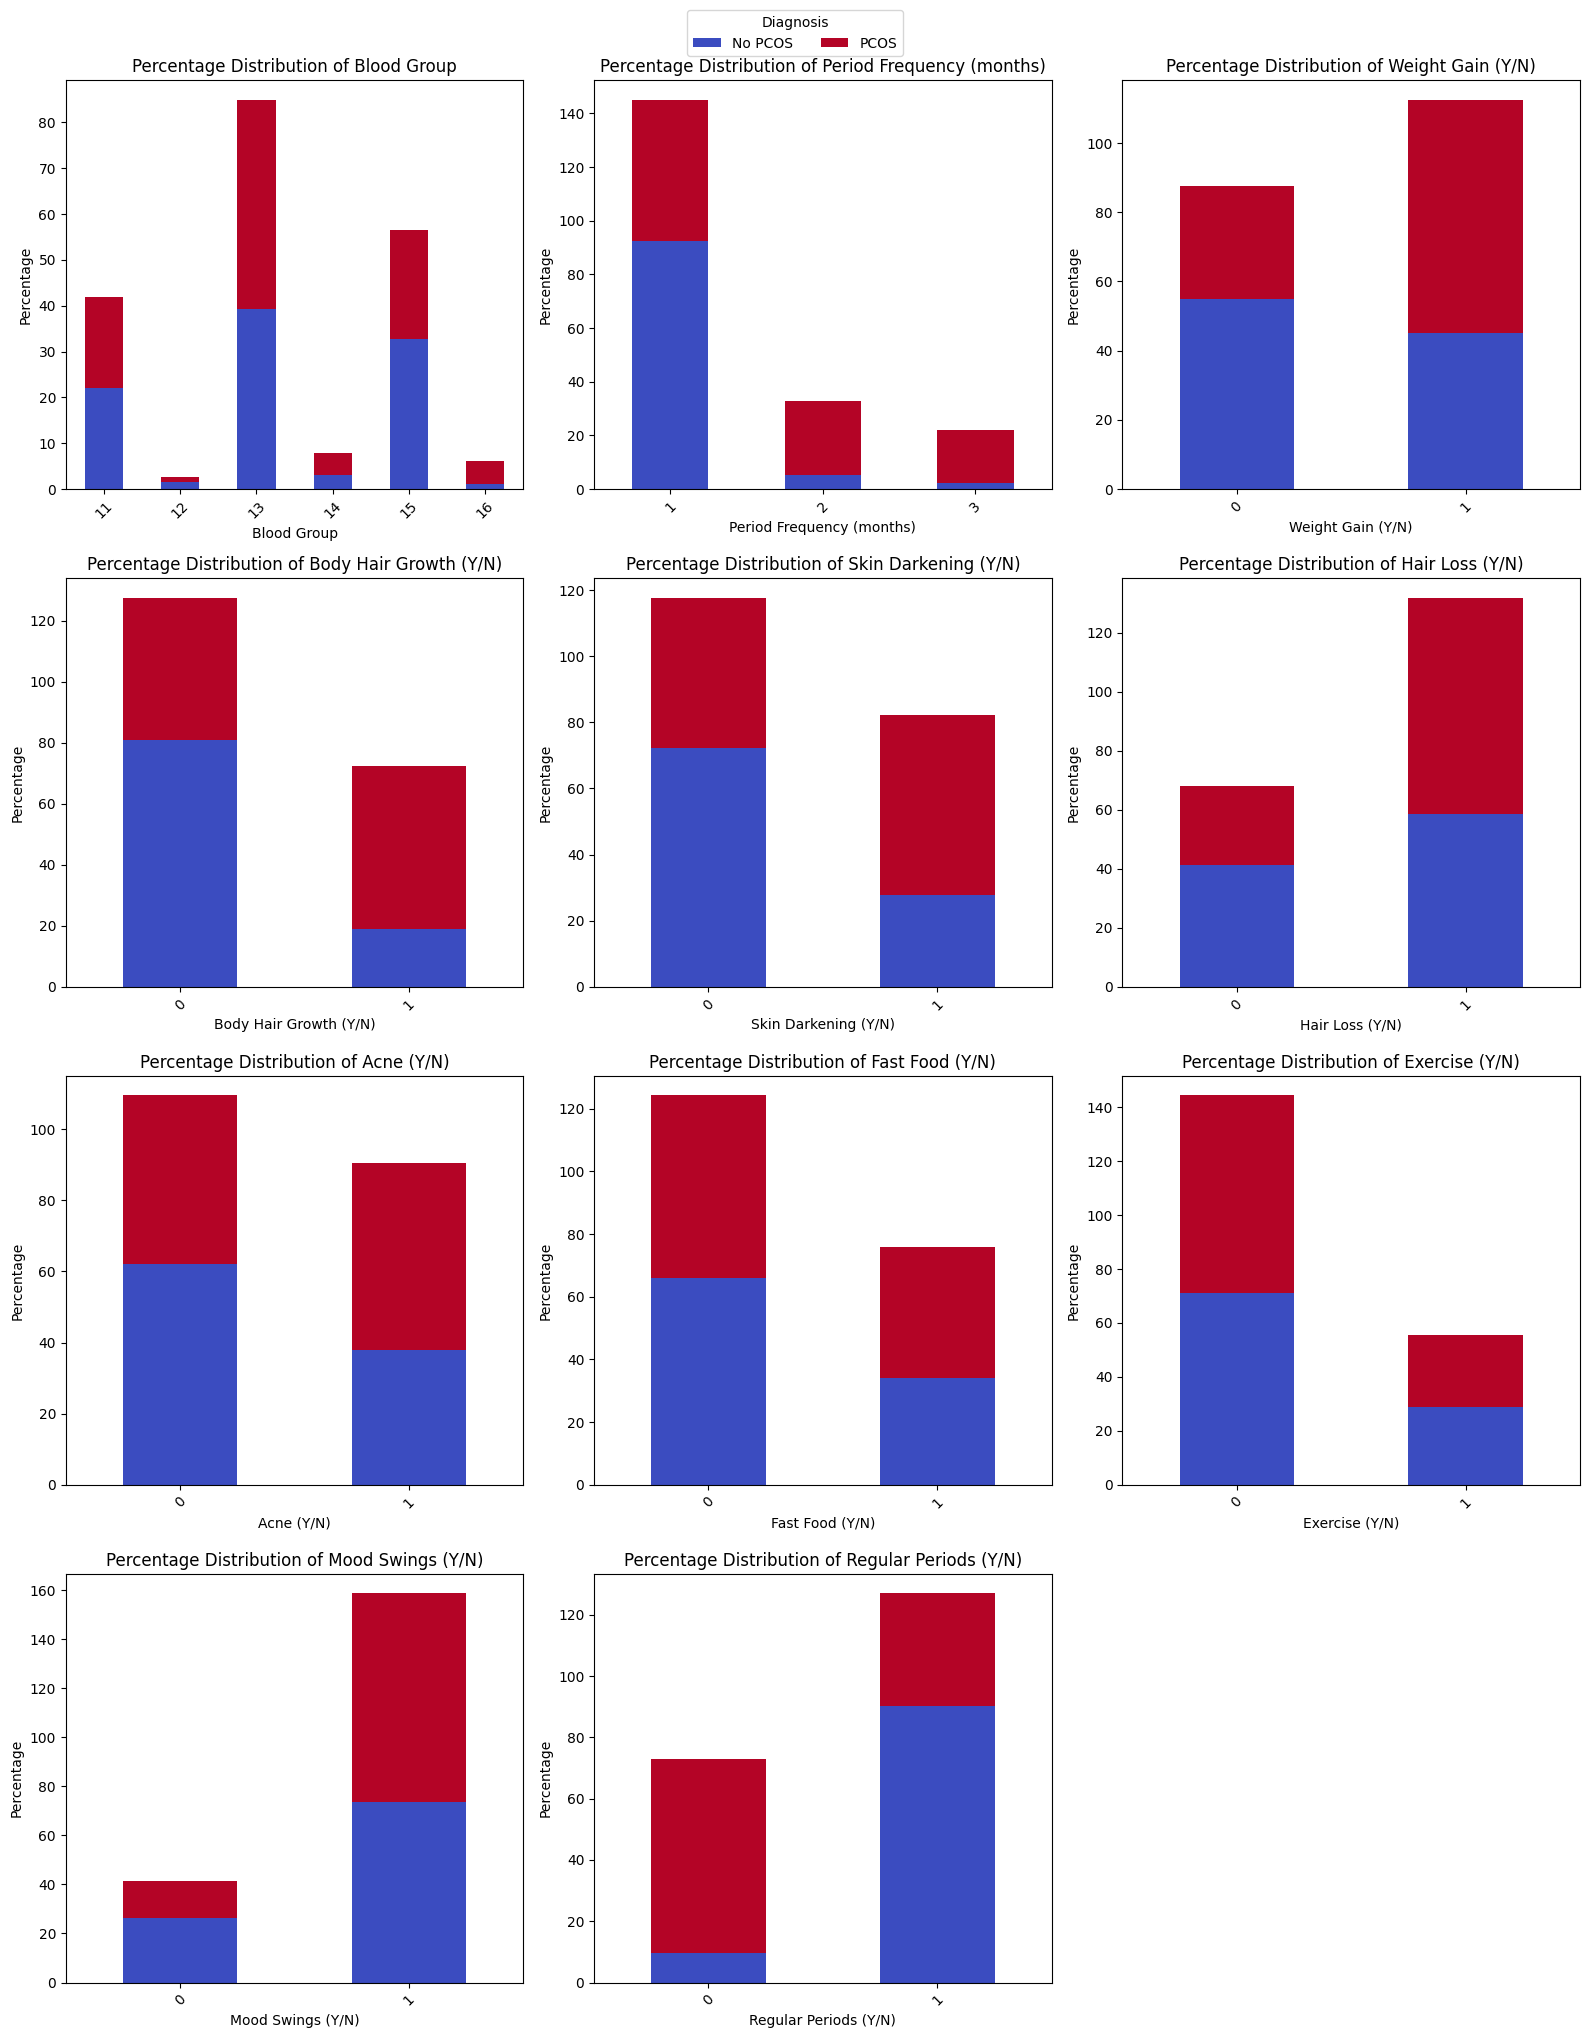

In [ ]:
categorical_columns = [col for col in df.columns if df[col].nunique() <= 10]  # Adjust for categorical-like columns

# Filter out the target column (PCOS)
categorical_columns = [col for col in categorical_columns if col != 'PCOS (Y/N)']

# Determine grid size for subplots (e.g., 3 columns per row)
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Loop through each categorical column and create a subplot
for i, col in enumerate(categorical_columns):
    # Group by PCOS Diagnosis and normalize within each group
    grouped_data = pd.crosstab(df[col], df['PCOS (Y/N)'], normalize='columns') * 100

    # Plot the grouped data on the appropriate subplot
    grouped_data.plot(
        kind='bar',
        stacked=True,
        colormap='coolwarm',
        ax=axes[i],
        legend=False  # Disable legend for individual plots
    )
    axes[i].set_title(f"Percentage Distribution of {col}")
    axes[i].set_ylabel("Percentage")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots (if number of columns exceeds features)
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Add a single legend for all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ["No PCOS", "PCOS"], title="Diagnosis", loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.02))

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a single image
plt.savefig("Percentage_Distribution_by_PCOS_Diagnosis.png", bbox_inches="tight")

# Show the figure
plt.show()

Chi-Square test

In [ ]:
from scipy.stats import chi2_contingency

# Function to perform Chi-Square test
def chi_square_test(data, feature, target='PCOS (Y/N)'):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {feature}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}\n")
    if p < 0.05:
        print(f"The feature '{feature}' has a significant relationship with PCOS (reject H₀).")
    else:
        print(f"The feature '{feature}' does not have a significant relationship with PCOS (fail to reject H₀).")
    print("-" * 50)

# Apply Chi-Square test for binary categorical variables
categorical_columns = ['Weight Gain (Y/N)', 'Body Hair Growth (Y/N)', 'Skin Darkening (Y/N)', 'Hair Loss (Y/N)', 'Acne (Y/N)',
                       'Fast Food (Y/N)', 'Exercise (Y/N)', 'Mood Swings (Y/N)', 'Regular Periods (Y/N)']

for feature in categorical_columns:
    chi_square_test(df, feature)

Feature: Weight Gain (Y/N)
Chi-Square Statistic: 14.630117557210266
P-value: 0.00013080730124454562

The feature 'Weight Gain (Y/N)' has a significant relationship with PCOS (reject H₀).
--------------------------------------------------
Feature: Body Hair Growth (Y/N)
Chi-Square Statistic: 46.40276998810024
P-value: 9.627930792321787e-12

The feature 'Body Hair Growth (Y/N)' has a significant relationship with PCOS (reject H₀).
--------------------------------------------------
Feature: Skin Darkening (Y/N)
Chi-Square Statistic: 23.932206098640926
P-value: 9.97883421835998e-07

The feature 'Skin Darkening (Y/N)' has a significant relationship with PCOS (reject H₀).
--------------------------------------------------
Feature: Hair Loss (Y/N)
Chi-Square Statistic: 6.523274477848023
P-value: 0.01064717943796948

The feature 'Hair Loss (Y/N)' has a significant relationship with PCOS (reject H₀).
--------------------------------------------------
Feature: Acne (Y/N)
Chi-Square Statistic: 6.

### Convert weight & height to BMI
Looking at raw height and weight may not be as informative. Creating a BMI (Body Mass Index) column is needed as BMI is a derived feature that combines weight and height into a single metric, allowing us to identify the relationship between weight and PCOS.

Formula to calculate the BMI:
BMI = weight (in kg) / (height (in meters)²)

In [ ]:
# Ensure weight and height columns are numeric
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

# Convert height from cm to meters
df['Height_m'] = df['Height'] / 100

# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)

# Display the first few rows to verify
print(df[['Weight', 'Height', 'Height_m', 'BMI']].head())

   Weight  Height  Height_m        BMI
0    47.0   168.0      1.68  16.652494
1    45.0   156.0      1.56  18.491124
2    37.0   162.0      1.62  14.098461
3    54.0   160.0      1.60  21.093750
4    40.0   150.0      1.50  17.777778


In [ ]:
from scipy.stats import ttest_ind

# Separate groups
pcos_bmi = df[df['PCOS (Y/N)'] == 1]['BMI']
non_pcos_bmi = df[df['PCOS (Y/N)'] == 0]['BMI']

# Perform T-Test
t_stat, p_value = ttest_ind(pcos_bmi, non_pcos_bmi, nan_policy='omit')
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -0.7536565876550746, P-Value: 0.4514393656001905


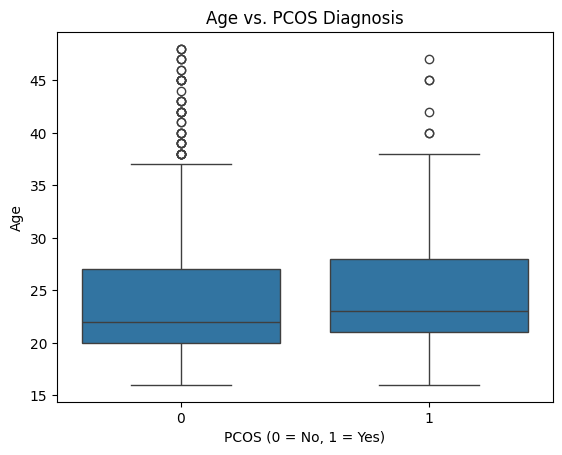

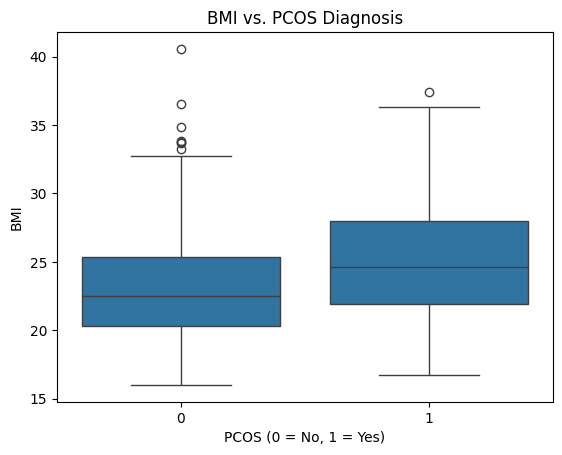

In [ ]:
# Boxplot for numeric features
# Define numeric features
numeric_features = ["Age", "BMI"]

# Optional: Handle outliers by capping at a certain percentile
def remove_outliers(df, feature, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(df[feature], lower_percentile)
    upper_bound = np.percentile(df[feature], upper_percentile)
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Iterate over numeric features
for feature in numeric_features:
    # Remove outliers for better visualization
    filtered_df = remove_outliers(df, feature)

    # Create the boxplot
    sns.boxplot(x="PCOS (Y/N)", y=feature, data=filtered_df)
    plt.title(f"{feature} vs. PCOS Diagnosis")
    plt.xlabel("PCOS (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.ylim(None)  # Adjust as needed or set a specific range
    plt.show()